In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = 2 * np.random.rand(100, 1)

In [5]:
y = 4 + 3 * X + np.random.randn(100, 1)

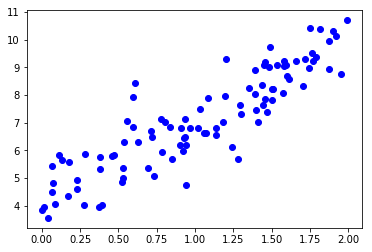

In [11]:
plt.plot(X, y, 'bo')

In [12]:
X_b = np.c_[np.ones((100, 1)), X]

In [18]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [20]:
theta_best

array([[ 4.22284439],
       [ 2.81103565]])

In [21]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)

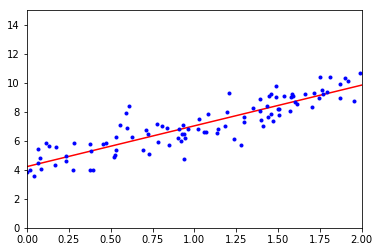

In [22]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
lin_reg.intercept_, lin_reg.coef_

(array([ 4.22284439]), array([[ 2.81103565]]))

In [26]:
lin_reg.predict(X_new)

array([[ 4.22284439],
       [ 9.8449157 ]])

### Gradient Descent

In [27]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

In [28]:
theta = np.random.randn(2,1) # random initialization

In [30]:
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [31]:
theta

array([[ 4.22284439],
       [ 2.81103565]])

### Stochastic GD

In [32]:
n_epochs = 50
t0, t1 = 5, 50 #learning schedule hyperparameters
def learning_schedule(t):
    return t0 / (t + t1)

In [33]:
theta = np.random.randn(2, 1)

In [34]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [35]:
theta

array([[ 4.17937272],
       [ 2.81228106]])

In [36]:
from sklearn.linear_model import SGDRegressor

In [37]:
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)

In [40]:
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=50, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

In [41]:
sgd_reg.intercept_, sgd_reg.coef_

(array([ 4.24514273]), array([ 2.83956593]))